<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ML-Pipeline-Preparation" data-toc-modified-id="ML-Pipeline-Preparation-1">ML Pipeline Preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Import-libraries-and-load-data-from-database." data-toc-modified-id="1.-Import-libraries-and-load-data-from-database.-1.0.1">1. Import libraries and load data from database.</a></span></li><li><span><a href="#2.-Write-a-tokenization-function-to-process-your-text-data" data-toc-modified-id="2.-Write-a-tokenization-function-to-process-your-text-data-1.0.2">2. Write a tokenization function to process your text data</a></span></li><li><span><a href="#3.-Build-a-machine-learning-pipeline" data-toc-modified-id="3.-Build-a-machine-learning-pipeline-1.0.3">3. Build a machine learning pipeline</a></span></li><li><span><a href="#4.-Train-pipeline" data-toc-modified-id="4.-Train-pipeline-1.0.4">4. Train pipeline</a></span></li><li><span><a href="#5.-Test-your-model" data-toc-modified-id="5.-Test-your-model-1.0.5">5. Test your model</a></span></li><li><span><a href="#6.-Improve-your-model" data-toc-modified-id="6.-Improve-your-model-1.0.6">6. Improve your model</a></span></li><li><span><a href="#7.-Test-your-model" data-toc-modified-id="7.-Test-your-model-1.0.7">7. Test your model</a></span></li><li><span><a href="#8.-Try-improving-your-model-further.-Here-are-a-few-ideas:" data-toc-modified-id="8.-Try-improving-your-model-further.-Here-are-a-few-ideas:-1.0.8">8. Try improving your model further. Here are a few ideas:</a></span></li><li><span><a href="#9.-Export-your-model-as-a-pickle-file" data-toc-modified-id="9.-Export-your-model-as-a-pickle-file-1.0.9">9. Export your model as a pickle file</a></span></li><li><span><a href="#10.-Use-this-notebook-to-complete-train.py" data-toc-modified-id="10.-Use-this-notebook-to-complete-train.py-1.0.10">10. Use this notebook to complete <code>train.py</code></a></span></li></ul></li></ul></li></ul></div>

# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [3]:
# import libraries
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('wordnet')

/Users/louwrenslabuschagne/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/louwrenslabuschagne/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# load data from database
engine = create_engine('sqlite:///../db/DisasterResponse.db')
with engine.begin() as conn:
    df = pd.read_sql('SELECT * FROM Message', con=conn)
X = df.message
Y = df.drop(['index', 'id', 'message', 'original', 'genre', 'index'], axis=1)

### 2. Write a tokenization function to process your text data

In [5]:
def tokenize(text):
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [6]:
pipeline = Pipeline([
                ('vect', CountVectorizer(tokenizer=tokenize)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [7]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.33)

In [8]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=1))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [9]:
Y_pred = pipeline.predict(X_test)

In [10]:
Y_pred.shape

(8652, 36)

In [11]:
Y_train.related.value_counts()

1    13372
0     4068
2      124
Name: related, dtype: int64

Prediction of 2's was a bit weird to see, but I see in `related` column in Y_test there are 2's. Not sure what these mean

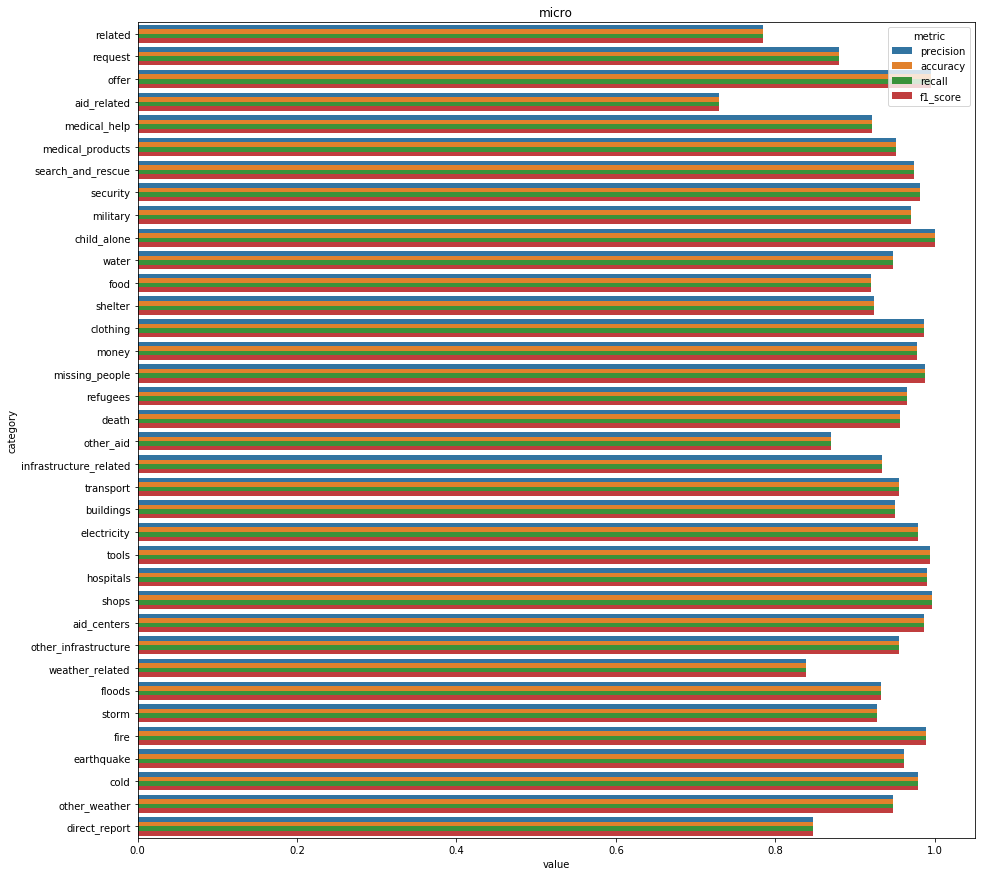

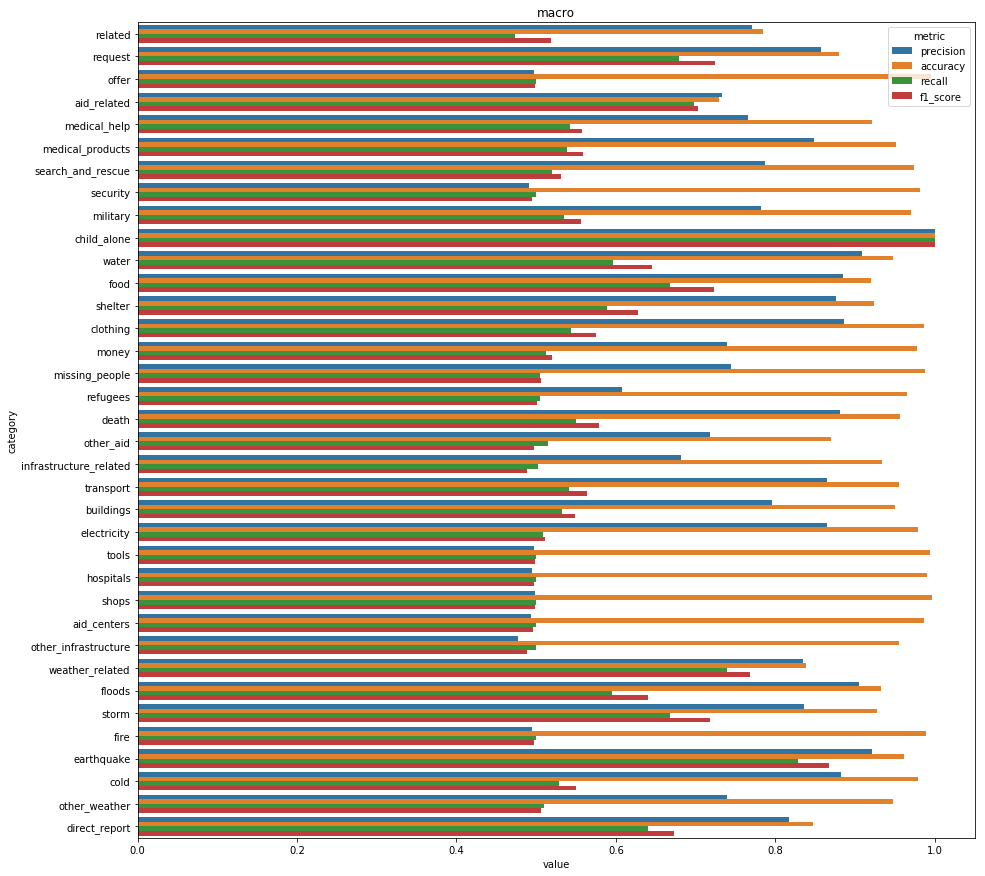

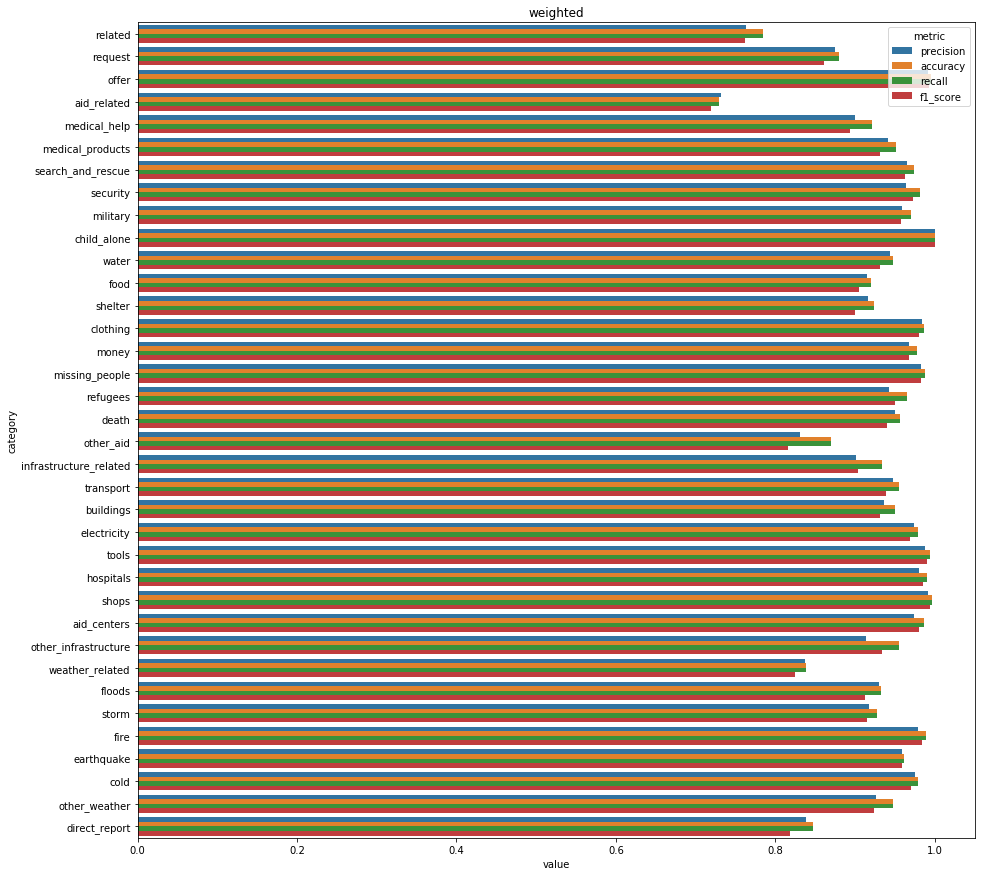

In [12]:
untuned_results = pd.DataFrame()

for averaging_method in ['micro', 'macro', 'weighted']:
    categories = []
    precisions = []
    accuracies = []
    recalls = []
    f1_scores = []
    
    for category, y_test, y_pred in zip(Y_test.columns, Y_test.values.T, Y_pred.T):
        categories.append(category)
        precisions.append(precision_score(y_test, y_pred, average=averaging_method))
        accuracies.append(accuracy_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred, average=averaging_method))
        f1_scores.append(f1_score(y_test, y_pred, average=averaging_method))

    results = pd.DataFrame(dict(category = categories, 
                                  precision = precisions,
                                  accuracy = accuracies, 
                                  recall = recalls,
                                  f1_score = f1_scores)).melt(id_vars = 'category', 
                    value_vars=['precision', 'accuracy', 'recall', 'f1_score'], 
                    var_name='metric')
    plt.figure(figsize=(15,15))
    sns.barplot(data=results, y='category',
                x='value', 
                hue='metric', )
    plt.title(averaging_method)
    plt.show()
    
    results['average_method'] = averaging_method
    untuned_results = pd.concat([untuned_results, results], axis=0)

In [13]:
untuned_results.head()

,category,metric,value,average_method
0,related,precision,0.783981,micro
1,request,precision,0.880490,micro
2,offer,precision,0.995608,micro
3,aid_related,precision,0.729889,micro
4,medical_help,precision,0.921521,micro


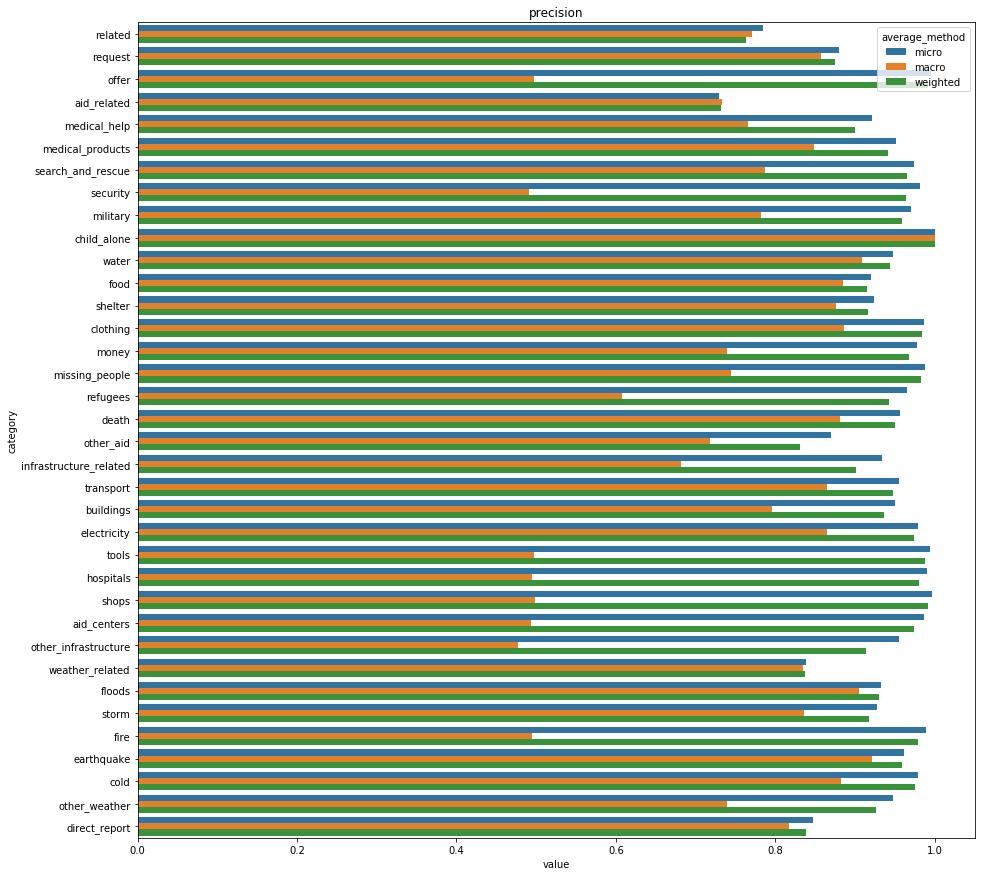

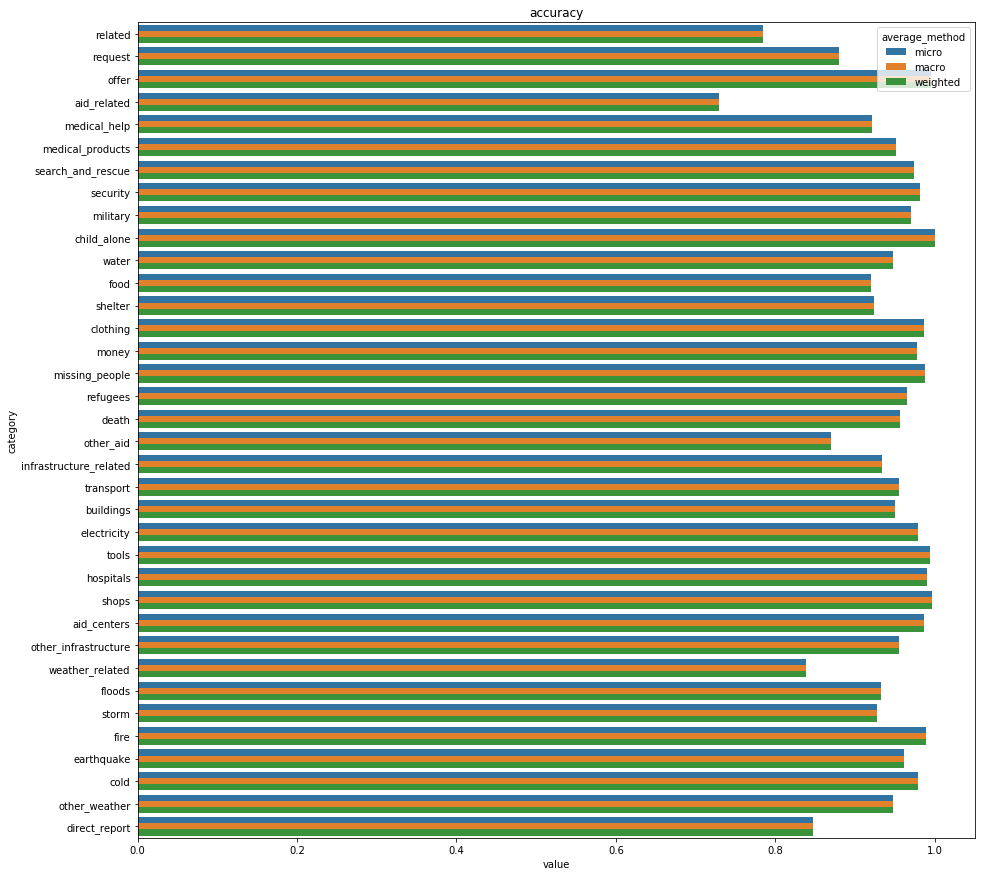

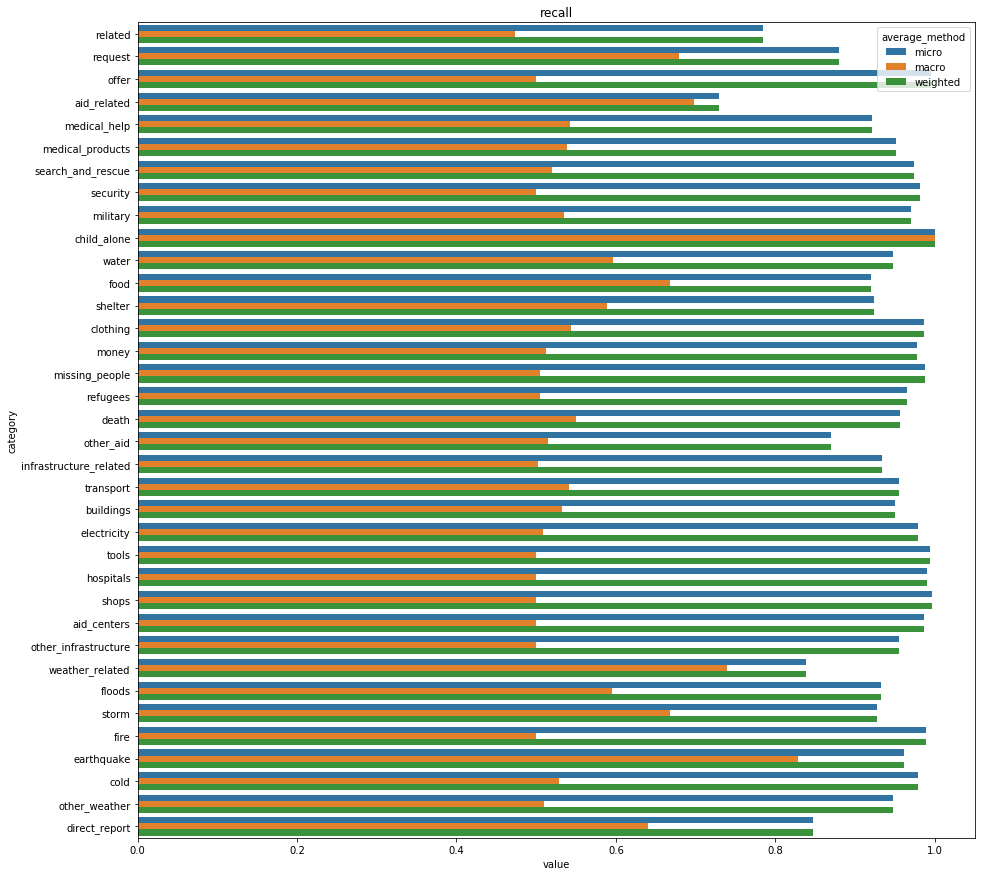

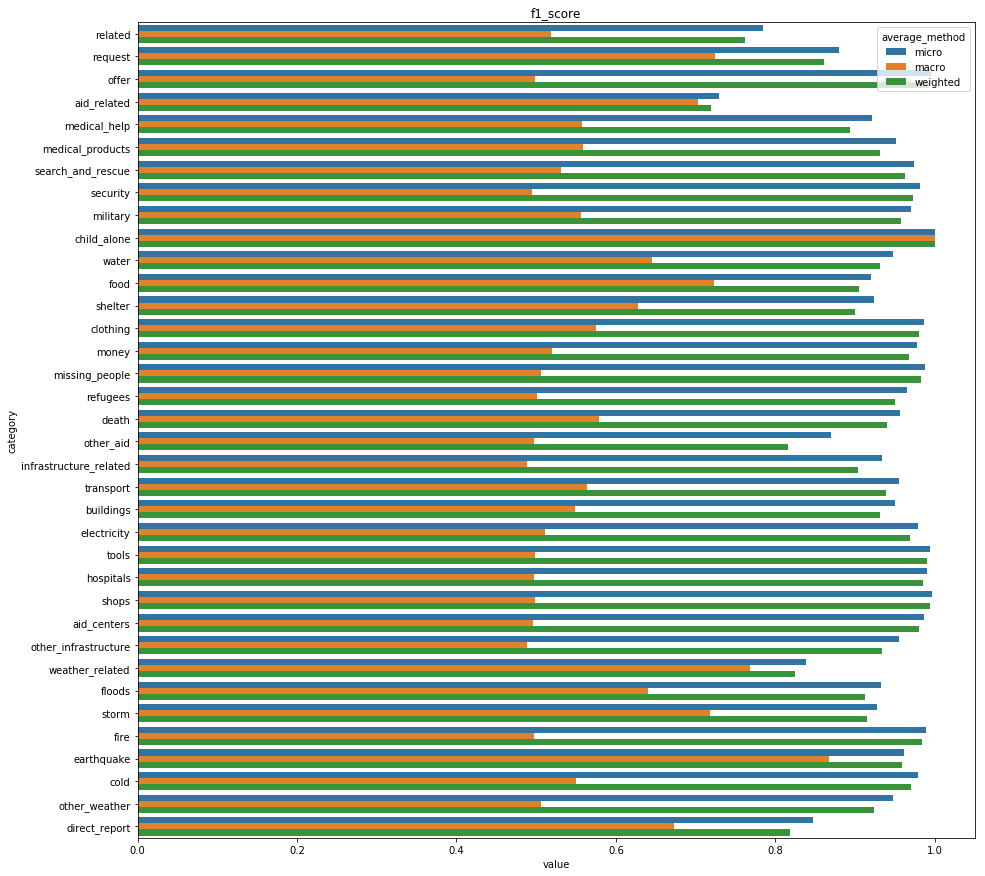

In [14]:
for metric in untuned_results.metric.unique():
    metric_df = untuned_results[untuned_results.metric == metric]

    plt.figure(figsize=(15,15))
    sns.barplot(data=metric_df, y='category', x='value', hue='average_method')
    plt.title(metric)
    plt.show()

### 6. Improve your model
Use grid search to find better parameters. 

In [42]:
parameters = {'vect__ngram_range': ((1, 1), (1, 2)),
        'vect__max_df': (0.5, 0.75, 1.0),
        'vect__max_features': (None, 5000, 10000),
        'tfidf__use_idf': (True, False),
        'clf__estimator__n_estimators': [50, 100, 200],
        'clf__estimator__min_samples_split': [2, 3, 4]}

cv = GridSearchCV(pipeline, param_grid=parameters)

In [43]:
cv.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__vect', 'estimator__tfidf', 'estimator__clf', 'estimator__vect__analyzer', 'estimator__vect__binary', 'estimator__vect__decode_error', 'estimator__vect__dtype', 'estimator__vect__encoding', 'estimator__vect__input', 'estimator__vect__lowercase', 'estimator__vect__max_df', 'estimator__vect__max_features', 'estimator__vect__min_df', 'estimator__vect__ngram_range', 'estimator__vect__preprocessor', 'estimator__vect__stop_words', 'estimator__vect__strip_accents', 'estimator__vect__token_pattern', 'estimator__vect__tokenizer', 'estimator__vect__vocabulary', 'estimator__tfidf__norm', 'estimator__tfidf__smooth_idf', 'estimator__tfidf__sublinear_tf', 'estimator__tfidf__use_idf', 'estimator__clf__estimator__bootstrap', 'estimator__clf__estimator__class_weight', 'estimator__clf__estimator__criterion', 'estimator__clf__estimator__max_depth', 'estimator__clf__estimator__max_features', 'estimator__clf__estimator__max

In [ ]:
cv.fit(X_train, Y_train)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
Y_pred = pipeline.predict(X_test)

In [ ]:
untuned_results = pd.DataFrame()

for averaging_method in ['micro', 'macro', 'weighted']:
    categories = []
    precisions = []
    accuracies = []
    recalls = []
    f1_scores = []
    
    for category, y_test, y_pred in zip(Y_test.columns, Y_test.values.T, Y_pred.T):
        categories.append(category)
        precisions.append(precision_score(y_test, y_pred, average=averaging_method))
        accuracies.append(accuracy_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred, average=averaging_method))
        f1_scores.append(f1_score(y_test, y_pred, average=averaging_method))

    results = pd.DataFrame(dict(category = categories, 
                                  precision = precisions,
                                  accuracy = accuracies, 
                                  recall = recalls,
                                  f1_score = f1_scores)).melt(id_vars = 'category', 
                    value_vars=['precision', 'accuracy', 'recall', 'f1_score'], 
                    var_name='metric')
    plt.figure(figsize=(15,15))
    sns.barplot(data=results, y='category',
                x='value', 
                hue='metric', )
    plt.title(averaging_method)
    plt.show()
    
    results['average_method'] = averaging_method
    untuned_results = pd.concat([untuned_results, results], axis=0)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.